In [1]:
from scipy.io import loadmat

# Replace 'your_hyperspectral_data.mat' with the path to your actual .mat file
data = loadmat('PaviaU.mat')
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'paviaU'])


PCA computation time: 0.702653169631958 seconds


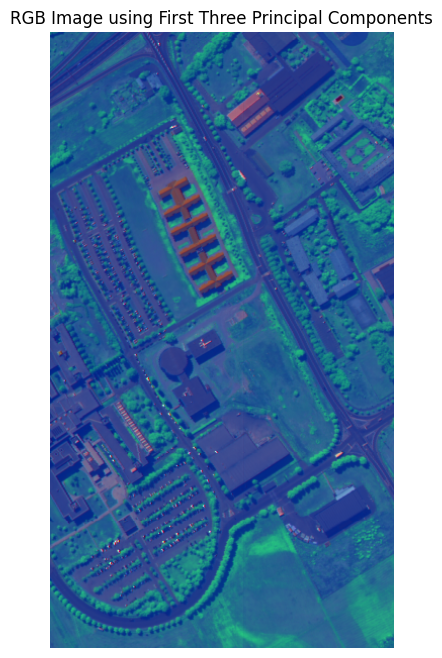

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.io import loadmat
from skimage import io
import time

# Load the hyperspectral data cube from a MAT file
data = loadmat('PaviaU.mat')
hyperspectral_cube = data['paviaU']  # Replace 'hyperspectral_cube' with the actual variable name

# Reshape the hyperspectral cube for PCA
# Assuming hyperspectral_cube is [rows, cols, bands]
rows, cols, bands = hyperspectral_cube.shape
reshaped_cube = np.reshape(hyperspectral_cube, (rows * cols, bands))

# Start timing the PCA computation
start_time = time.time()

# Perform PCA on the reshaped data
pca = PCA(n_components=3)  # Specify to only extract the first three components
principal_components = pca.fit_transform(reshaped_cube)

# End timing the PCA computation
end_time = time.time()

# Compute the total duration for the PCA
pca_duration = end_time - start_time
print(f"PCA computation time: {pca_duration} seconds")

# Reshape back to the original image shape with three components
rgb_image = np.reshape(principal_components, (rows, cols, 3))

# Normalize the RGB image to [0, 1] for visualization
# Ensure every channel is scaled individually
rgb_image_min = rgb_image.min(axis=(0, 1), keepdims=True)
rgb_image_max = rgb_image.max(axis=(0, 1), keepdims=True)
rgb_image = (rgb_image - rgb_image_min) / (rgb_image_max - rgb_image_min)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(rgb_image)
plt.title('RGB Image using First Three Principal Components')
plt.axis('off')
plt.show()

# Save the image to a file
io.imsave('PCA_RGB_Image.png', np.uint8(rgb_image * 255))


SVD computation time: 30.31888222694397 seconds


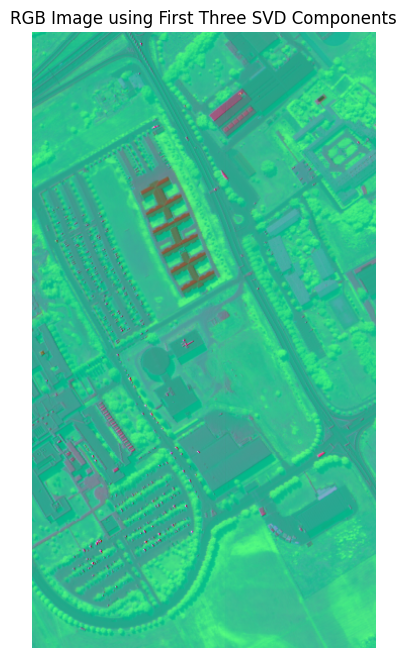

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.io import loadmat
from skimage import io
import time

# Load the hyperspectral data cube from a MAT file
data = loadmat('PaviaU.mat')
hyperspectral_cube = data['paviaU']  # Ensure to replace 'paviaU' with your actual variable name

# Reshape the hyperspectral cube for SVD
# Assuming hyperspectral_cube is [rows, cols, bands]
rows, cols, bands = hyperspectral_cube.shape
reshaped_cube = np.reshape(hyperspectral_cube, (rows * cols, bands))

# Start timing the SVD computation
start_time = time.time()

# Perform Truncated SVD on the reshaped data
svd = TruncatedSVD(n_components=3)
svd_results = svd.fit_transform(reshaped_cube)

# End timing the SVD computation
end_time = time.time()

# Compute the total duration for the SVD
svd_duration = end_time - start_time
print(f"SVD computation time: {svd_duration} seconds")

# Reshape back to the original image shape with three components
rgb_image = np.reshape(svd_results, (rows, cols, 3))

# Normalize the RGB image to [0, 1] for visualization
# Ensure every channel is scaled individually
rgb_image_min = rgb_image.min(axis=(0, 1), keepdims=True)
rgb_image_max = rgb_image.max(axis=(0, 1), keepdims=True)
rgb_image = (rgb_image - rgb_image_min) / (rgb_image_max - rgb_image_min)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(rgb_image)
plt.title('RGB Image using First Three SVD Components')
plt.axis('off')
plt.show()

# Save the image to a file
io.imsave('SVD_RGB_Image.png', np.uint8(rgb_image * 255))


Random Projection computation time: 0.7629477977752686 seconds


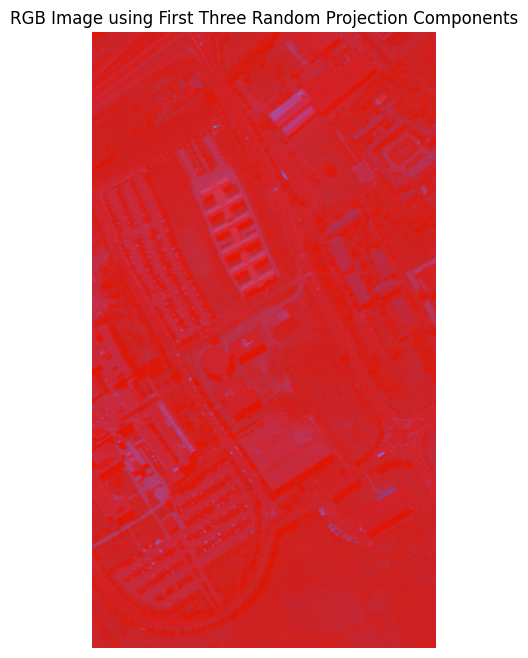

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from scipy.io import loadmat
from skimage import io
import time

# Load the hyperspectral data cube from a MAT file
data = loadmat('PaviaU.mat')
hyperspectral_cube = data['paviaU']  # Ensure to replace 'paviaU' with your actual variable name

# Reshape the hyperspectral cube for random projections
# Assuming hyperspectral_cube is [rows, cols, bands]
rows, cols, bands = hyperspectral_cube.shape
reshaped_cube = np.reshape(hyperspectral_cube, (rows * cols, bands))

# Start timing the Random Projection computation
start_time = time.time()

# Perform Gaussian Random Projection on the reshaped data
rp = GaussianRandomProjection(n_components=3)
rp_results = rp.fit_transform(reshaped_cube)

# End timing the Random Projection computation
end_time = time.time()

# Compute the total duration for the Random Projection
rp_duration = end_time - start_time
print(f"Random Projection computation time: {rp_duration} seconds")

# Reshape back to the original image shape with three components
rgb_image = np.reshape(rp_results, (rows, cols, 3))

# Normalize the RGB image to [0, 1] for visualization
# Ensure every channel is scaled individually
rgb_image_min = rgb_image.min(axis=(0, 1), keepdims=True)
rgb_image_max = rgb_image.max(axis=(0, 1), keepdims=True)
rgb_image = (rgb_image - rgb_image_min) / (rgb_image_max - rgb_image_min)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(rgb_image)
plt.title('RGB Image using First Three Random Projection Components')
plt.axis('off')
plt.show()

# Save the image to a file
io.imsave('RandomProjection_RGB_Image.png', np.uint8(rgb_image * 255))


ICA computation time: 9.79436206817627 seconds


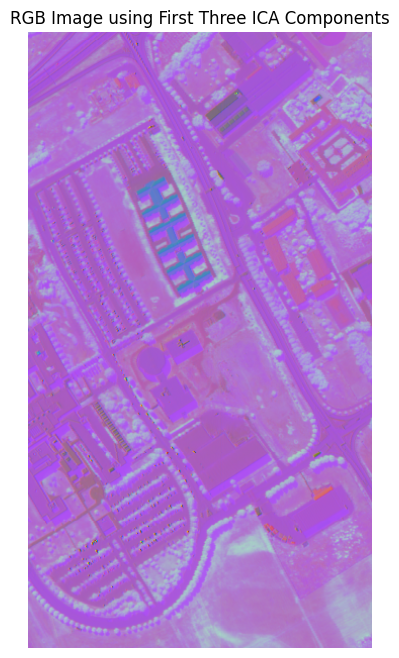

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import loadmat
from skimage import io
import time

# Load the hyperspectral data cube from a MAT file
data = loadmat('PaviaU.mat')
hyperspectral_cube = data['paviaU']  # Replace 'paviaU' with the actual variable name

# Reshape the hyperspectral cube for ICA
# Assuming hyperspectral_cube is [rows, cols, bands]
rows, cols, bands = hyperspectral_cube.shape
reshaped_cube = np.reshape(hyperspectral_cube, (rows * cols, bands))

# Start timing the ICA computation
start_time = time.time()

# Perform ICA on the reshaped data
ica = FastICA(n_components=3, random_state=0)  # Specify to only extract the first three components
independent_components = ica.fit_transform(reshaped_cube)

# End timing the ICA computation
end_time = time.time()

# Compute the total duration for the ICA
ica_duration = end_time - start_time
print(f"ICA computation time: {ica_duration} seconds")

# Reshape back to the original image shape with three components
rgb_image = np.reshape(independent_components, (rows, cols, 3))

# Normalize the RGB image to [0, 1] for visualization
# Ensure every channel is scaled individually
rgb_image_min = rgb_image.min(axis=(0, 1), keepdims=True)
rgb_image_max = rgb_image.max(axis=(0, 1), keepdims=True)
rgb_image = (rgb_image - rgb_image_min) / (rgb_image_max - rgb_image_min)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(rgb_image)
plt.title('RGB Image using First Three ICA Components')
plt.axis('off')
plt.show()

# Save the image to a file
io.imsave('ICA_RGB_Image.png', np.uint8(rgb_image * 255))
